# Análise de vibração de motor pelos eixos (X,Y,Z)
### Por: Kevin De Mello Satamaría
É proposta a análise de quatro sensores de vibração que medem o deslocamento do motor nos tres eixos. 

### Bibliotecas utilizadas
Pandas: Usado para o manejo de dados de forma organizada que permite ter maior facilidade para o uso de dados pequenos como é neste caso. 

Matplotlib: Biblioteca convencional para visuailzação dos dados de uma gráfica.

Seaborn: Biblioteca para visualização de dados com maiores funcionalidades que o matplotlib.

Numpy: Usado para o manejo de vetores e dados numéricos. 

Scipy: Disponibiliza ferramentas científicas para a análise de dados e contrução de modelos. 
    -FFT: Trasformação rápida de Fourier para análise de sinais.
    -Signal: Usada para a análise de sinais, na qual foi usada o Butter e o Filtfilt para limpar o sinal e deixar com menor quantidade de ruido. 
    -FFTPack: Maior quantidade de ferramentas para análise de Fourier. 


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import scipy as sp
import seaborn as sns
from scipy.fft import fft, ifft 
from scipy.signal import butter,filtfilt
from scipy.signal import find_peaks
from scipy import fftpack

#### Importação de arquivos 

Primeiramente se extraiu os arquivos que estavam na pasta chamada Parte 1 para guardar numa variavél do tipo List. 

In [2]:
import os 
path = "C:\\Users\\kevin\\Desktop\\Vibracao_Motor\\part_1"
files = os.listdir(path)
print("Files and directories in '", path, "' :")
print(files[0])

Files and directories in ' C:\Users\kevin\Desktop\Vibracao_Motor\part_1 ' :
1623535615-3006-IAJ9206.csv


Posteriormente se encaixoa cara variavél dentro de um dataframe. E mostro o começo do DataFrame usando a funcionalidade Head do pandas. 

In [3]:
df1 = pd.read_csv(path+"\\"+files[0])
df2 = pd.read_csv(path+"\\"+files[1])
df3 = pd.read_csv(path+"\\"+files[2])
df4 = pd.read_csv(path+"\\"+files[3])
df = pd.concat([df1,df2,df3,df4])
df['Tensor'] = np.sqrt((df['x']**2)+(df['y']**2)+(df['z']**2))
df['time'] = np.arange(len(df))

In [25]:
df1.head()

,x,y,z
0,-1.003174,-0.097778,-0.017334
1,-0.993591,-0.084778,-0.009766
2,-0.964844,-0.048462,0.062012
3,-0.868591,-0.010437,0.103577
4,-0.885498,-0.041992,0.078003


In [26]:
df2.head()

,x,y,z
0,0.029053,0.040283,0.995361
1,0.034851,0.041809,0.991455
2,0.043213,0.046143,0.988708
3,0.042297,0.037048,0.990601
4,0.050903,0.031860,0.996826


In [27]:
df3.head()

,x,y,z
0,-0.913757,0.082458,-0.118225
1,-1.098572,0.048035,-0.115417
2,-1.151794,0.058899,-0.067078
3,-1.091187,-0.041626,-0.098022
4,-1.145691,-0.017517,-0.100891


In [28]:
df4.head()

,x,y,z
0,0.056030,-0.132202,1.070740
1,0.012695,-0.122559,1.105103
2,-0.034119,-0.059143,1.287842
3,-0.099854,-0.018066,1.352234
4,-0.147156,-0.015686,1.086365


#### Gráficos de cada sensor 

##### Sensor 1

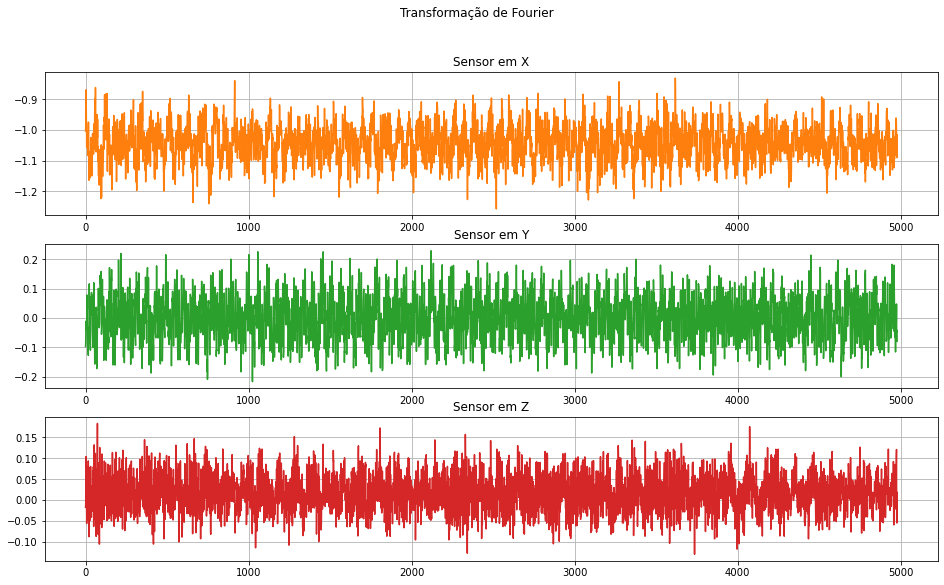

In [30]:
fig, axs = plt.subplots(3,figsize=(16,9))
fig.suptitle('Transformação de Fourier')
axs[0].set_title('Sensor em X')
axs[0].plot(df1['x'], 'tab:orange')
axs[0].grid()
axs[1].set_title('Sensor em Y')
axs[1].plot(df1['y'], 'tab:green')
axs[1].grid()
axs[2].set_title('Sensor em Z')
axs[2].plot(df1['z'], 'tab:red')
axs[2].grid()
plt.show()

##### Sensor 2

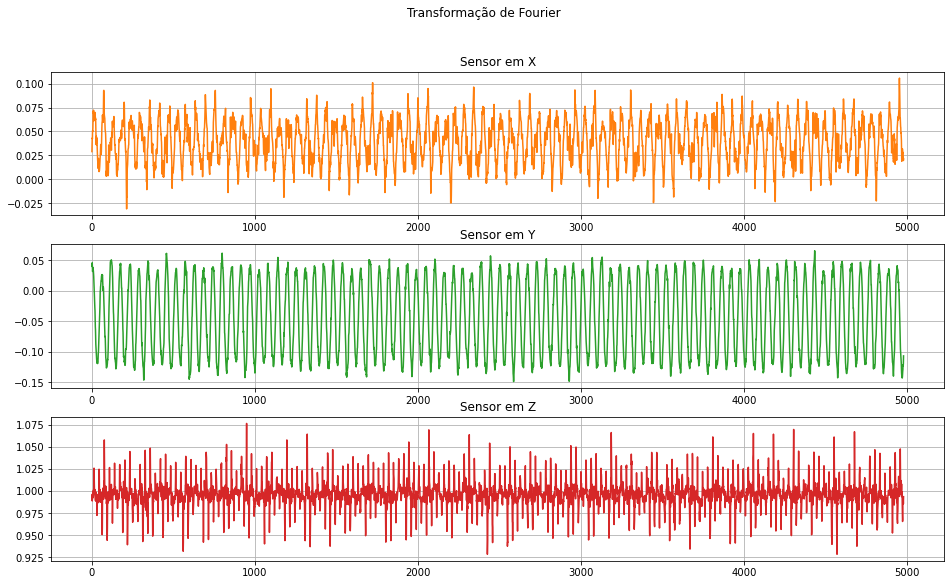

In [31]:
fig, axs = plt.subplots(3,figsize=(16,9))
fig.suptitle('Transformação de Fourier')
axs[0].set_title('Sensor em X')
axs[0].plot(df2['x'], 'tab:orange')
axs[0].grid()
axs[1].set_title('Sensor em Y')
axs[1].plot(df2['y'], 'tab:green')
axs[1].grid()
axs[2].set_title('Sensor em Z')
axs[2].plot(df2['z'], 'tab:red')
axs[2].grid()
plt.show()

##### Sensor 3

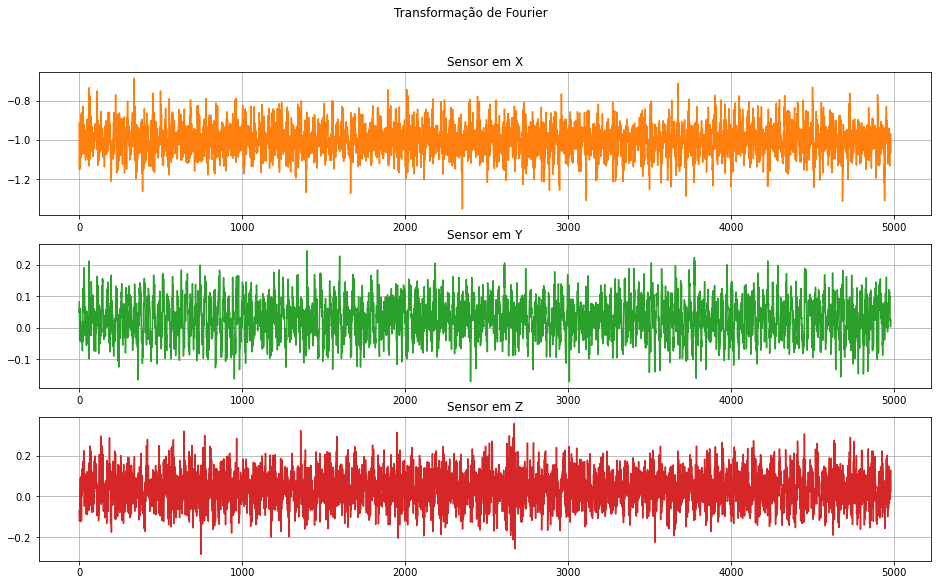

In [32]:
fig, axs = plt.subplots(3,figsize=(16,9))
fig.suptitle('Transformação de Fourier')
axs[0].set_title('Sensor em X')
axs[0].plot(df3['x'], 'tab:orange')
axs[0].grid()
axs[1].set_title('Sensor em Y')
axs[1].plot(df3['y'], 'tab:green')
axs[1].grid()
axs[2].set_title('Sensor em Z')
axs[2].plot(df3['z'], 'tab:red')
axs[2].grid()
plt.show()

##### Sensor 4

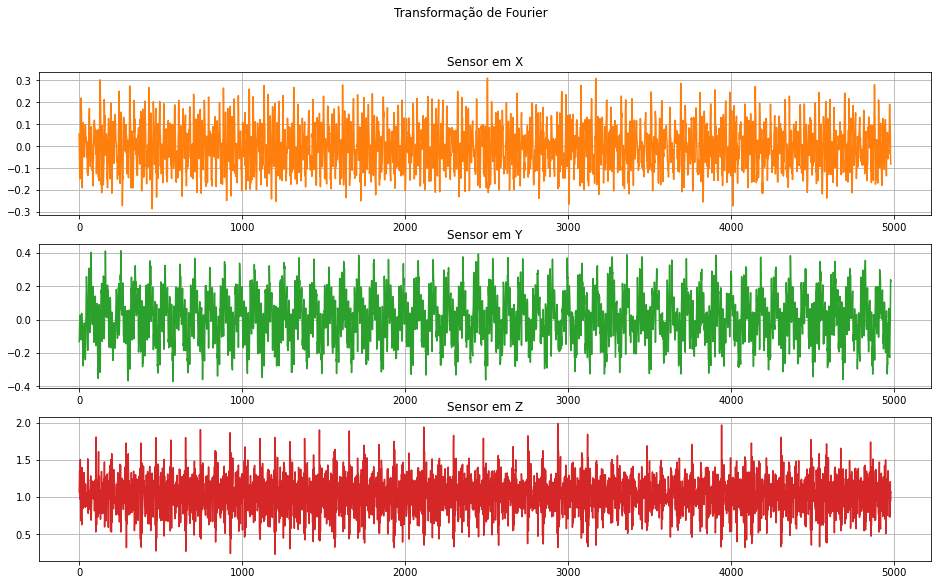

In [33]:
fig, axs = plt.subplots(3,figsize=(16,9))
fig.suptitle('Transformação de Fourier')
axs[0].set_title('Sensor em X')
axs[0].plot(df4['x'], 'tab:orange')
axs[0].grid()
axs[1].set_title('Sensor em Y')
axs[1].plot(df4['y'], 'tab:green')
axs[1].grid()
axs[2].set_title('Sensor em Z')
axs[2].plot(df4['z'], 'tab:red')
axs[2].grid()
plt.show()

### Transformação rápida de Fourier



#### Sensor 1

In [41]:
fft_x_df1 = fft(df1['x'].values)
fft_y_df1 = fft(df1['y'].values)
fft_z_df1 = fft(df1['z'].values)
fftfreq_x_df1=fftpack.fftfreq(fft_x_df1.size, 1 / 25e3)
fftfreq_y_df1=fftpack.fftfreq(fft_y_df1.size, 1 / 25e3)
fftfreq_z_df1=fftpack.fftfreq(fft_z_df1.size, 1 / 25e3)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


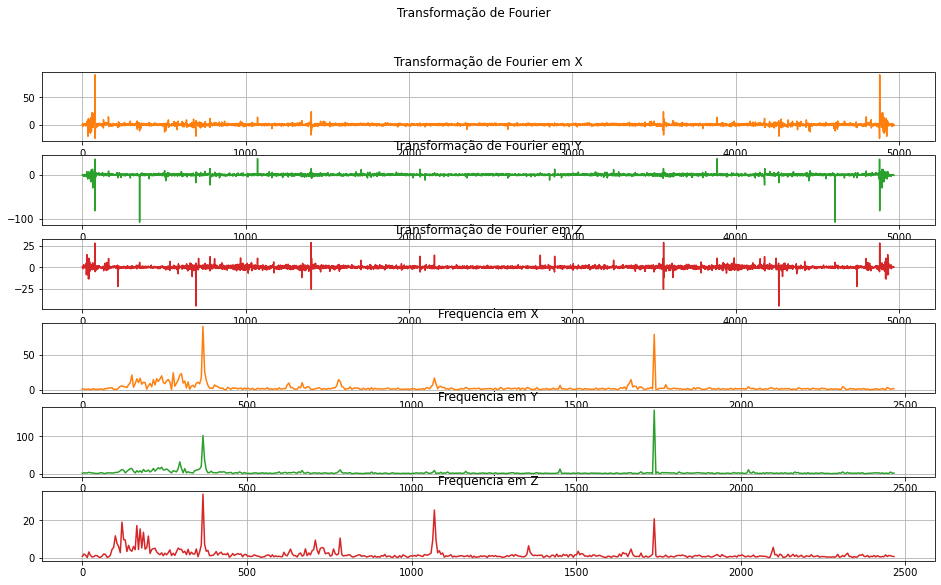

In [42]:
fig, axs = plt.subplots(6,figsize=(16,9))
fig.suptitle('Transformação de Fourier')
axs[0].set_title('Transformação de Fourier em X')
axs[0].plot(fft_x_df1[10:], 'tab:orange')
axs[0].grid()
axs[1].set_title('Transformação de Fourier em Y')
axs[1].plot(fft_y_df1[10:], 'tab:green')
axs[1].grid()
axs[2].set_title('Transformação de Fourier em Z')
axs[2].plot(fft_z_df1[10:], 'tab:red')
axs[2].grid()
axs[3].set_title('Frequencia em X')
axs[3].plot(fftfreq_x_df1[:fftfreq_x_df1[15:1000].size//2], abs(fft_x_df1[15:1000])[:fft_x_df1[15:1000].size//2], 'tab:orange')
axs[3].grid()
axs[4].set_title('Frequencia em Y')
axs[4].plot(fftfreq_y_df1[:fftfreq_y_df1[15:1000].size//2], abs(fft_y_df1[15:1000])[:fft_y_df1[15:1000].size//2], 'tab:green')
axs[4].grid()
axs[5].set_title('Frequencia em Z')
axs[5].plot(fftfreq_z_df1[:fftfreq_z_df1[15:1000].size//2], abs(fft_z_df1[15:1000])[:fft_z_df1[15:1000].size//2], 'tab:red')
axs[5].grid()
plt.show()

#### Sensor 2

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


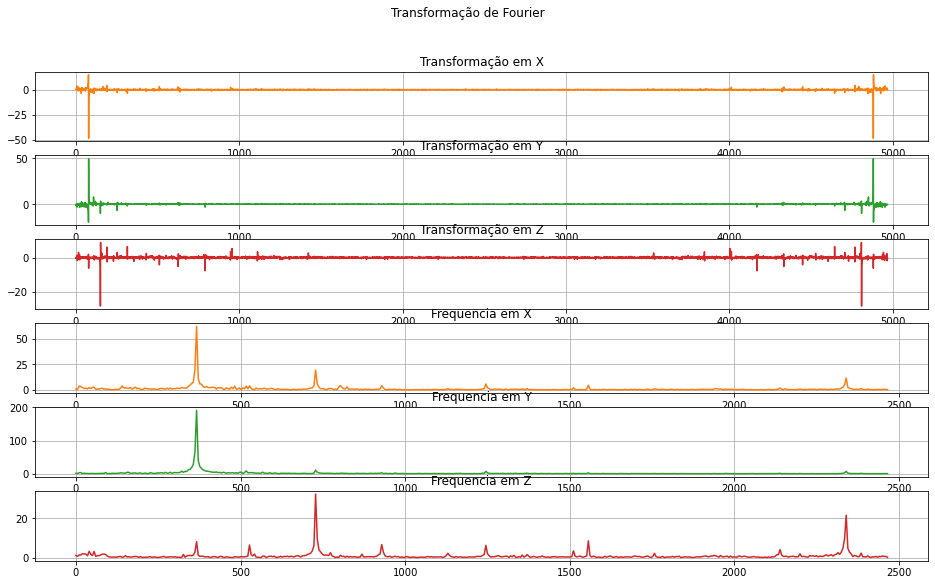

In [43]:
fft_x_df2 = fft(df2['x'].values)
fft_y_df2 = fft(df2['y'].values)
fft_z_df2 = fft(df2['z'].values)
fftfreq_x_df2=fftpack.fftfreq(fft_x_df2.size, 1 / 25e3)
fftfreq_y_df2=fftpack.fftfreq(fft_y_df2.size, 1 / 25e3)
fftfreq_z_df2=fftpack.fftfreq(fft_z_df2.size, 1 / 25e3)

fig, axs = plt.subplots(6,figsize=(16,9))
fig.suptitle('Transformação de Fourier')
axs[0].set_title('Transformação em X')
axs[0].plot(fft_x_df2[10:], 'tab:orange')
axs[0].grid()
axs[1].set_title('Transformação em Y')
axs[1].plot(fft_y_df2[10:], 'tab:green')
axs[1].grid()
axs[2].set_title('Transformação em Z')
axs[2].plot(fft_z_df2[10:], 'tab:red')
axs[2].grid()
axs[3].set_title('Frequencia em X')
axs[3].plot(fftfreq_x_df1[:fftfreq_x_df2[15:1000].size//2], abs(fft_x_df2[15:1000])[:fft_x_df2[15:1000].size//2], 'tab:orange')
axs[3].grid()
axs[4].set_title('Frequencia em Y')
axs[4].plot(fftfreq_y_df1[:fftfreq_y_df2[15:1000].size//2], abs(fft_y_df2[15:1000])[:fft_y_df2[15:1000].size//2], 'tab:green')
axs[4].grid()
axs[5].set_title('Frequencia em Z')
axs[5].plot(fftfreq_z_df1[:fftfreq_z_df2[15:1000].size//2], abs(fft_z_df2[15:1000])[:fft_z_df2[15:1000].size//2], 'tab:red')
axs[5].grid()
plt.show()

#### Sensor 3

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


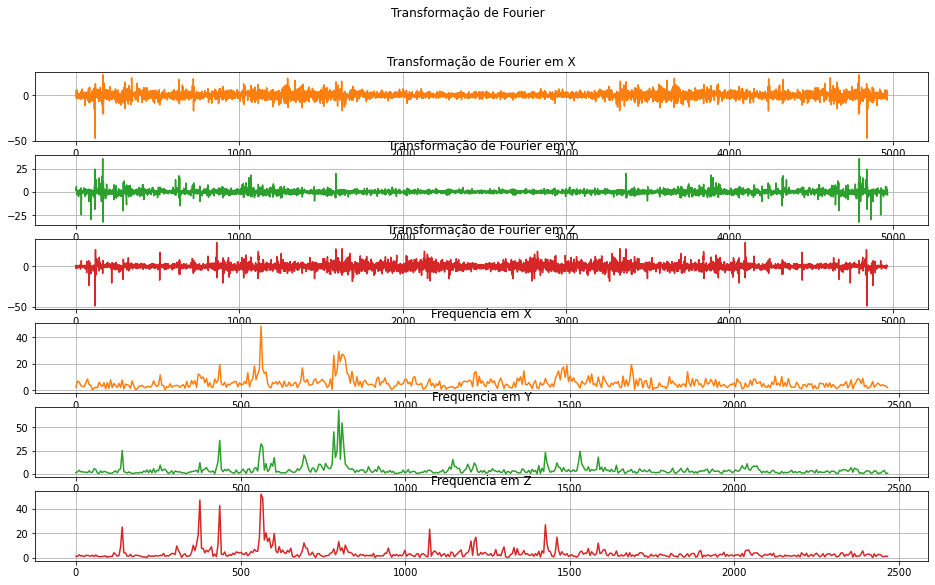

In [44]:
fft_x_df3 = fft(df3['x'].values)
fft_y_df3 = fft(df3['y'].values)
fft_z_df3 = fft(df3['z'].values)
fftfreq_x_df3=fftpack.fftfreq(fft_x_df2.size, 1 / 25e3)
fftfreq_y_df3=fftpack.fftfreq(fft_y_df2.size, 1 / 25e3)
fftfreq_z_df3=fftpack.fftfreq(fft_z_df2.size, 1 / 25e3)

fig, axs = plt.subplots(6,figsize=(16,9))
fig.suptitle('Transformação de Fourier')
axs[0].set_title('Transformação de Fourier em X')
axs[0].plot(fft_x_df3[10:], 'tab:orange')
axs[0].grid()
axs[1].set_title('Transformação de Fourier em Y')
axs[1].plot(fft_y_df3[10:], 'tab:green')
axs[1].grid()
axs[2].set_title('Transformação de Fourier em Z')
axs[2].plot(fft_z_df3[10:], 'tab:red')
axs[2].grid()
axs[3].set_title('Frequencia em X')
axs[3].plot(fftfreq_x_df3[:fftfreq_x_df1[15:1000].size//2], abs(fft_x_df3[15:1000])[:fft_x_df3[15:1000].size//2], 'tab:orange')
axs[3].grid()
axs[4].set_title('Frequencia em Y')
axs[4].plot(fftfreq_y_df3[:fftfreq_y_df1[15:1000].size//2], abs(fft_y_df3[15:1000])[:fft_y_df3[15:1000].size//2], 'tab:green')
axs[4].grid()
axs[5].set_title('Frequencia em Z')
axs[5].plot(fftfreq_z_df3[:fftfreq_z_df1[15:1000].size//2], abs(fft_z_df3[15:1000])[:fft_z_df3[15:1000].size//2], 'tab:red')
axs[5].grid()
plt.show()

#### Sensor 4

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


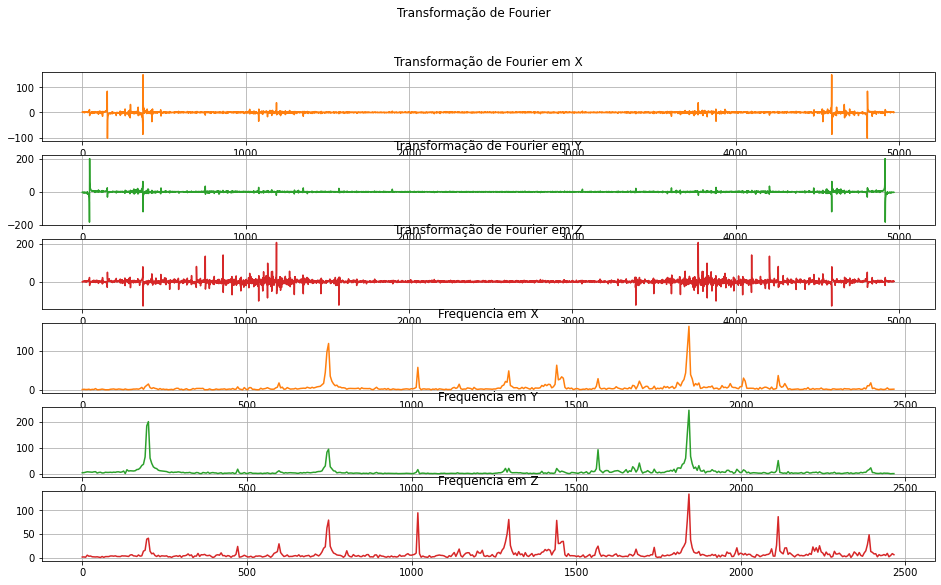

In [45]:
fft_x_df4 = fft(df4['x'].values)
fft_y_df4 = fft(df4['y'].values)
fft_z_df4 = fft(df4['z'].values)
fftfreq_x_df4=fftpack.fftfreq(fft_x_df2.size, 1 / 25e3)
fftfreq_y_df4=fftpack.fftfreq(fft_y_df2.size, 1 / 25e3)
fftfreq_z_df4=fftpack.fftfreq(fft_z_df2.size, 1 / 25e3)

fig, axs = plt.subplots(6,figsize=(16,9))
fig.suptitle('Transformação de Fourier')
axs[0].set_title('Transformação de Fourier em X')
axs[0].plot(fft_x_df4[10:], 'tab:orange')
axs[0].grid()
axs[1].set_title('Transformação de Fourier em Y')
axs[1].plot(fft_y_df4[10:], 'tab:green')
axs[1].grid()
axs[2].set_title('Transformação de Fourier em Z')
axs[2].plot(fft_z_df4[10:], 'tab:red')
axs[2].grid()
axs[3].set_title('Frequencia em X')
axs[3].plot(fftfreq_x_df4[:fftfreq_x_df1[15:1000].size//2], abs(fft_x_df4[15:1000])[:fft_x_df4[15:1000].size//2], 'tab:orange')
axs[3].grid()
axs[4].set_title('Frequencia em Y')
axs[4].plot(fftfreq_y_df4[:fftfreq_y_df1[15:1000].size//2], abs(fft_y_df4[15:1000])[:fft_y_df4[15:1000].size//2], 'tab:green')
axs[4].grid()
axs[5].set_title('Frequencia em Z')
axs[5].plot(fftfreq_z_df4[:fftfreq_z_df1[15:1000].size//2], abs(fft_z_df4[15:1000])[:fft_z_df4[15:1000].size//2], 'tab:red')
axs[5].grid()
plt.show()

#### Filtros 

In [74]:
def Analise_Geral(df):
    t = np.arange(len(df['x'].values))
    xn = df['x'].values
    from scipy import signal
    b, a = signal.butter(3, 0.05)
    zi = signal.lfilter_zi(b, a)
    z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])
    z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
    xy = signal.filtfilt(b, a, xn)
    plt.figure(figsize=(10,5))
    plt.title('Filtro em X')
    plt.plot(t, xn, 'b', alpha=0.75)
    plt.plot(t, z, 'r--', t, z2, 'r', t, yx, 'k')
    plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice','filtfilt'), loc='best')
    plt.grid(True)
    plt.show()
    t = np.arange(len(df1['x'].values))
    xn = df['y'].values
    from scipy import signal
    b, a = signal.butter(3, 0.05)
    zi = signal.lfilter_zi(b, a)
    z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])
    z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
    yy = signal.filtfilt(b, a, xn)
    plt.figure(figsize=(10,5))
    plt.title('Filtro em Y')
    plt.plot(t, xn, 'b', alpha=0.75)
    plt.plot(t, z, 'r--', t, z2, 'r', t, yx, 'k')
    plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice','filtfilt'), loc='best')
    plt.grid(True)
    plt.show()
    t = np.arange(len(df1['z'].values))
    xn = df['z'].values
    from scipy import signal
    b, a = signal.butter(3, 0.05)
    zi = signal.lfilter_zi(b, a)
    z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])
    z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
    zy = signal.filtfilt(b, a, xn)
    plt.figure(figsize=(10,5))
    plt.title('Filtro em Z')
    plt.plot(t, xn, 'b', alpha=0.75)
    plt.plot(t, z, 'r--', t, z2, 'r', t, yx, 'k')
    plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice','filtfilt'), loc='best')
    plt.grid(True)
    plt.show()
    # Trasformada de Fourier
    fft_x_limpo = fft(yx)
    fft_y_limpo = fft(yy)
    fft_z_limpo = fft(yz)
    # Frequencia 
    fftpack_x_limpo=fftpack.fftfreq(fft_x_limpo.size, 1 / 25e3)
    fftpack_y_limpo=fftpack.fftfreq(fft_y_limpo.size, 1 / 25e3)
    fftpack_z_limpo=fftpack.fftfreq(fft_z_limpo.size, 1 / 25e3)
    # Picos
    peaks_x_limpo, _ = find_peaks(abs(fft_x_limpo[15:1000])[:fft_x_limpo[15:1000].size//2])
    peaks_y_limpo, _ = find_peaks(abs(fft_y_limpo[10:1000])[:fft_y_limpo[10:1000].size//2])
    peaks_z_limpo, _ = find_peaks(abs(fft_z_limpo[15:1000])[:fft_z_limpo[15:1000].size//2])
    
    fig, axs = plt.subplots(3,figsize=(16,9))
    fig.suptitle('Filtro')
    axs[0].set_title('Filtro em X')
    axs[0].plot(fft_x_limpo[10:], 'tab:orange')
    axs[0].grid()
    axs[1].set_title('Filtro em Y')
    axs[1].plot(fft_y_limpo[10:], 'tab:green')
    axs[1].grid()
    axs[2].set_title('Filtro em Z')
    axs[2].plot(fft_z_limpo[10:], 'tab:red')
    axs[2].grid()
    plt.show()
    fig, axs = plt.subplots(3,figsize=(16,9))
    fig.suptitle('Filtro')
    axs[0].set_title('Frequencia em X')
    axs[0].plot(fftpack_x_limpo[:fftpack_x_limpo[15:1000].size//2], abs(fft_x_limpo[15:1000])[:fft_x_limpo[15:1000].size//2], 'tab:orange')
    axs[0].grid()
    axs[1].set_title('Frequencia em Y')
    axs[1].plot(fftpack_y_limpo[:fftpack_y_limpo[10:1000].size//2], abs(fft_y_limpo[10:1000])[:fft_y_limpo[10:1000].size//2], 'tab:green')
    axs[1].grid()
    axs[2].set_title('Frequencia em Z')
    axs[2].plot(fftpack_z_limpo[:fftpack_z_limpo[15:1000].size//2], abs(fft_z_limpo[15:1000])[:fft_z_limpo[15:1000].size//2], 'tab:red')
    axs[2].grid()
    plt.show()

    

    print("Os Picos para o eixo X são dentro das frequências: "+ str(peaks_x_limpo))
    print("Os Picos para o eixo Y são dentro das frequências: "+ str(peaks_y_limpo))
    print("Os Picos para o eixo Z são dentro das frequências: "+ str(peaks_z_limpo))

##### Sensor 1

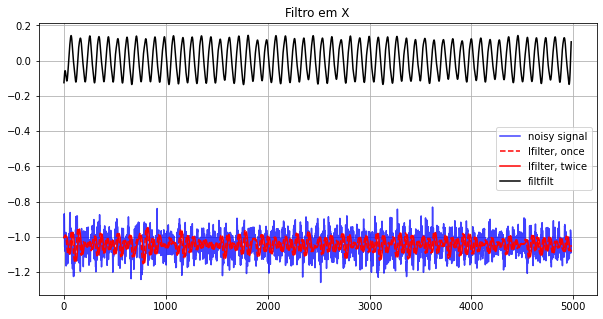

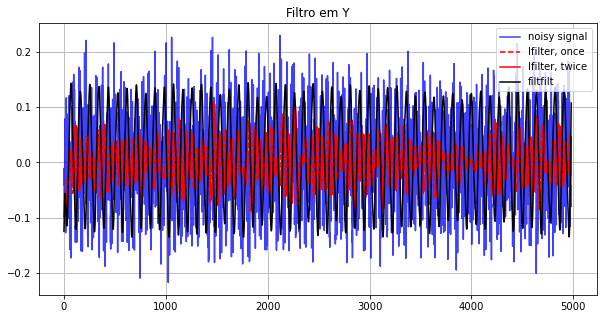

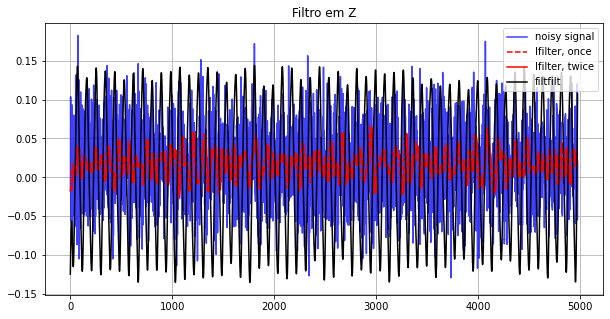

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


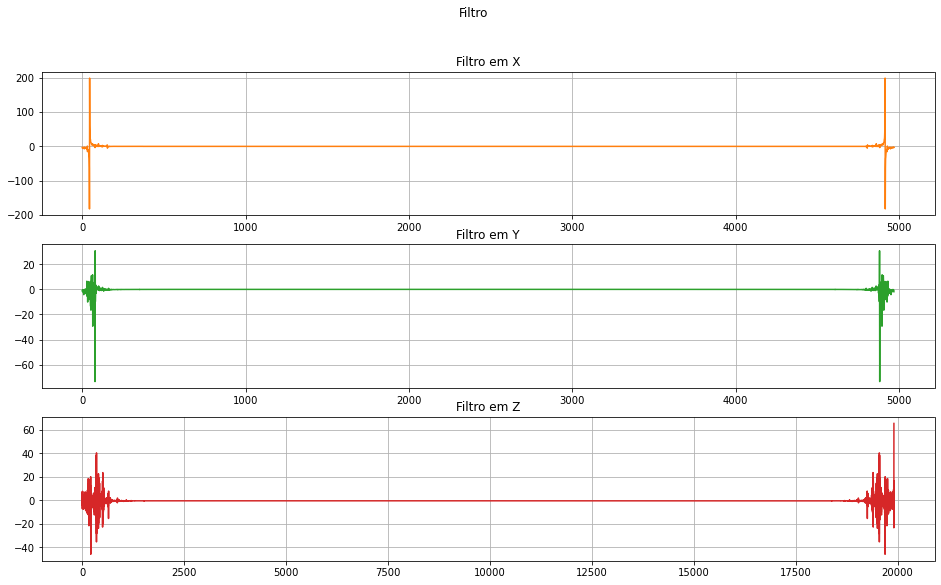

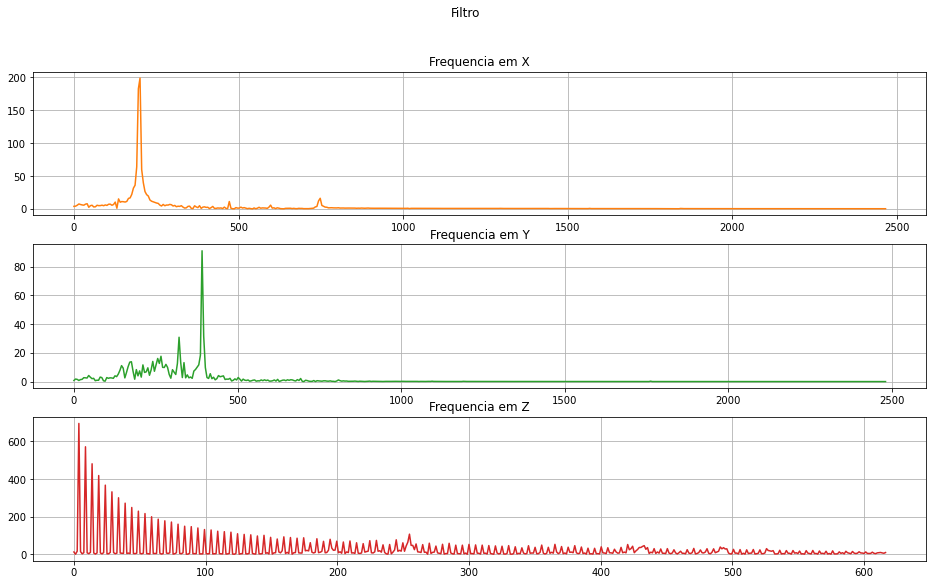

Os Picos para o eixo X são dentro das frequências: [  3   8  11  14  17  19  22  25  27  29  40  54  56  58  61  63  65  70
  73  76  79  81  84  87  89  91  94  98 101 103 106 109 112 114 119 121
 123 130 133 136 138 141 149 156 160 163 165 170 172 174 178 181 183 185
 187 193 196 198 202 207 209 212 215 220 226 228 231 233 235 238 240 242
 245 247 258 262 265 269 271 273 277 279 281 283 287 289 291 294 299 303
 305 309 312 316 319 321 324 326 330 332 336 338 341 343 345 348 350 357
 359 361 367 371 373 376 379 381 385 388 390 393 397 401 403 412 416 421
 423 427 430 434 439 446 453 468 478]
Os Picos para o eixo Y são dentro das frequências: [  1   6   9  12  14  16  20  22  25  29  35  38  40  42  45  48  51  53
  56  60  64  67  69  71  78  83  85  88  91  93  95  98 100 103 106 110
 112 114 116 118 122 124 128 130 132 136 138 141 146 148 152 156 161 164
 166 169 171 174 180 182 185 190 192 195 198 200 206 208 211 216 218 220
 223 228 231 233 237 244 246 249 252 255 258 261 265 267 

In [75]:
Analise_Geral(df1)

##### Sensor 2

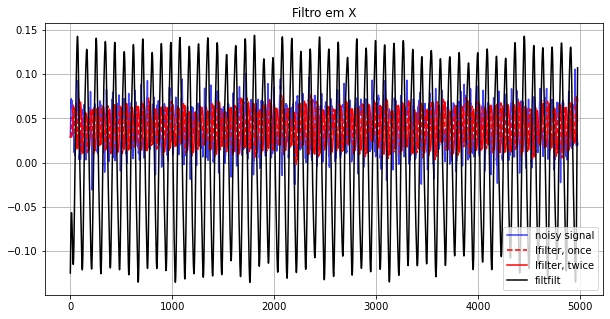

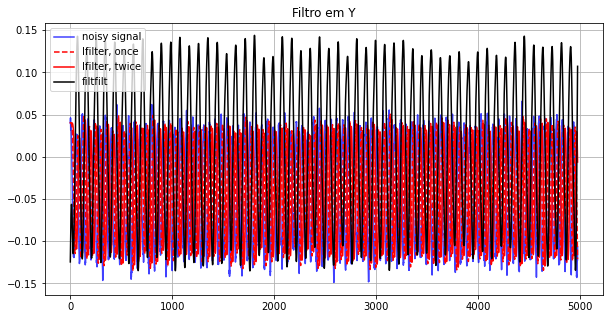

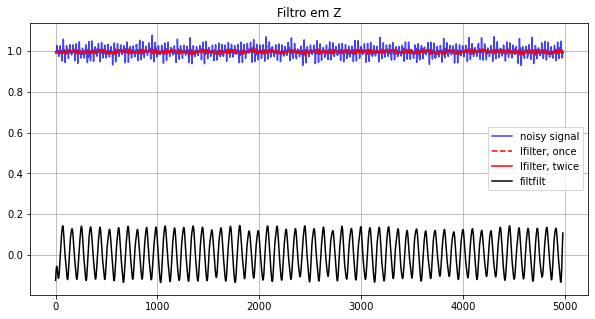

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


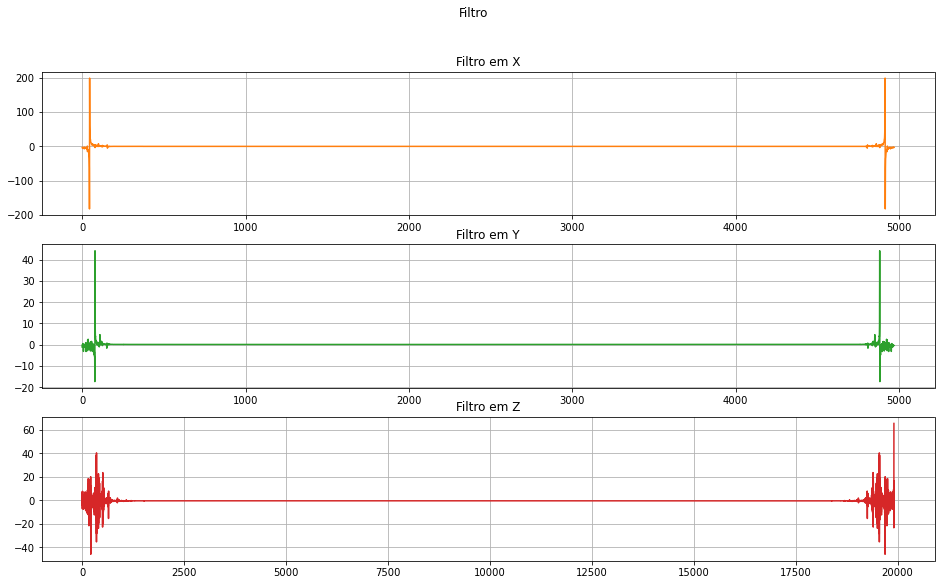

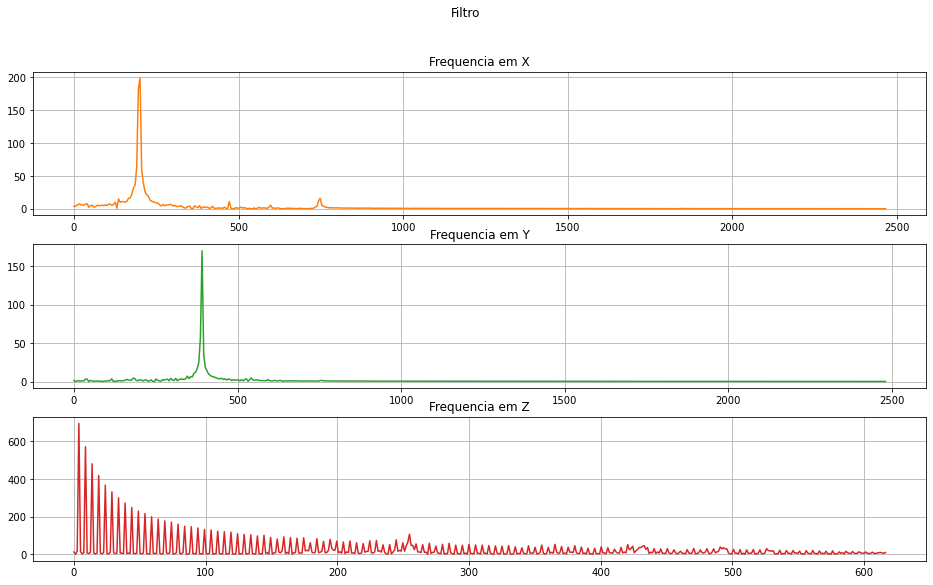

Os Picos para o eixo X são dentro das frequências: [  3   8  11  14  17  19  22  25  27  29  40  54  56  58  61  63  65  70
  73  76  79  81  84  87  89  91  94  98 101 103 106 109 112 114 119 121
 123 130 133 136 138 141 149 156 160 163 165 170 172 174 178 181 183 185
 187 193 196 198 202 207 209 212 215 220 226 228 231 233 235 238 240 242
 245 247 258 262 265 269 271 273 277 279 281 283 287 289 291 294 299 303
 305 309 312 316 319 321 324 326 330 332 336 338 341 343 345 348 350 357
 359 361 367 371 373 376 379 381 385 388 390 393 397 401 403 412 416 421
 423 427 430 434 439 446 453 468 478]
Os Picos para o eixo Y são dentro das frequências: [  3   5   8  10  15  23  25  27  32  36  40  44  47  50  54  57  59  62
  65  69  71  78  90  92  94  97 100 102 105 108 111 115 118 122 126 129
 131 134 136 138 143 146 150 156 159 163 166 169 172 175 178 181 183 186
 190 193 195 198 202 205 207 212 215 217 220 222 224 227 231 235 237 240
 242 246 251 254 257 261 263 266 268 270 274 276 278 281 

In [76]:
Analise_Geral(df2)

##### Sensor 3

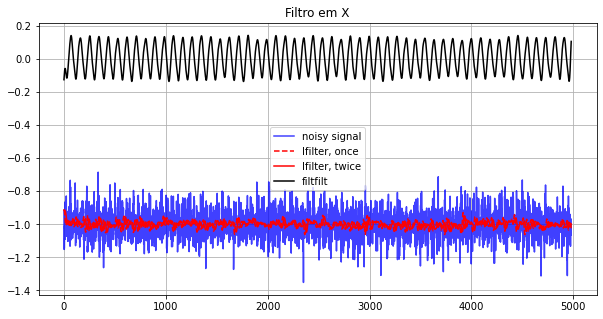

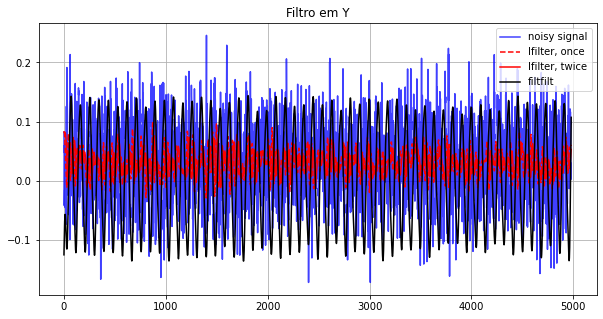

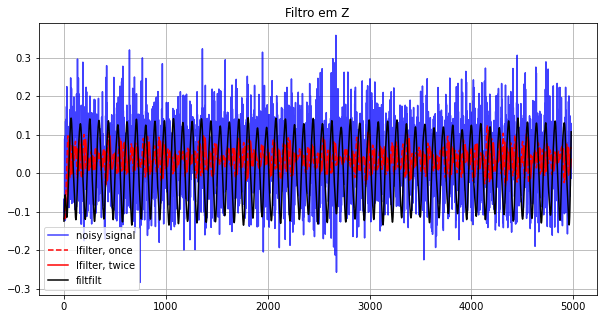

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


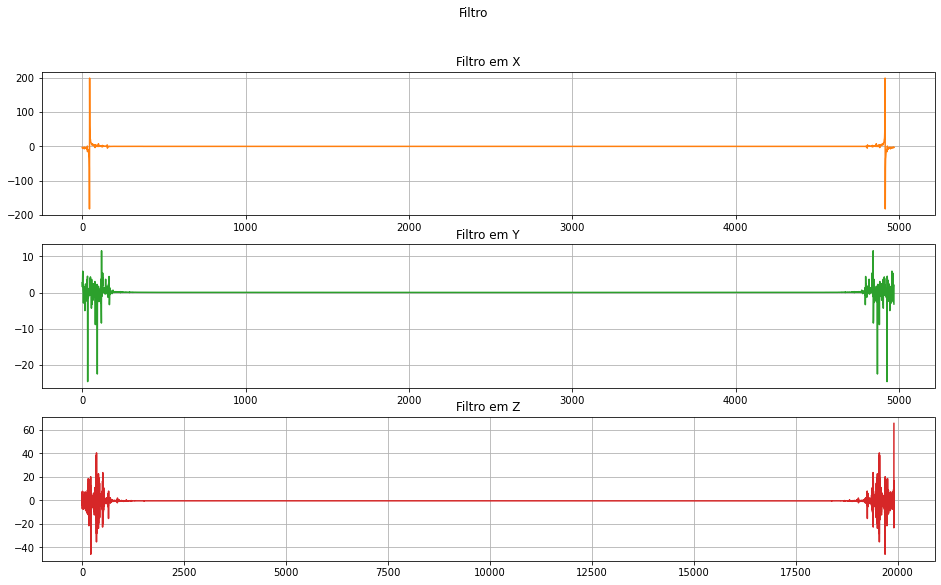

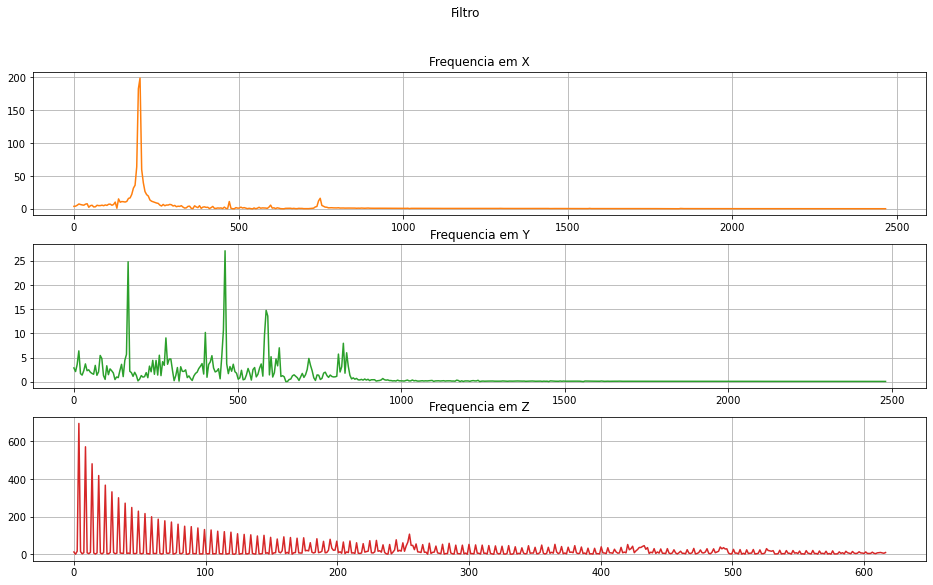

Os Picos para o eixo X são dentro das frequências: [  3   8  11  14  17  19  22  25  27  29  40  54  56  58  61  63  65  70
  73  76  79  81  84  87  89  91  94  98 101 103 106 109 112 114 119 121
 123 130 133 136 138 141 149 156 160 163 165 170 172 174 178 181 183 185
 187 193 196 198 202 207 209 212 215 220 226 228 231 233 235 238 240 242
 245 247 258 262 265 269 271 273 277 279 281 283 287 289 291 294 299 303
 305 309 312 316 319 321 324 326 330 332 336 338 341 343 345 348 350 357
 359 361 367 371 373 376 379 381 385 388 390 393 397 401 403 412 416 421
 423 427 430 434 439 446 453 468 478]
Os Picos para o eixo Y são dentro das frequências: [  3   7   9  13  16  20  22  26  29  33  37  41  44  46  48  50  52  54
  56  59  63  65  68  70  78  80  84  88  92  95  97 102 106 110 114 117
 120 123 125 127 134 139 143 148 153 156 161 164 166 170 172 175 177 179
 182 188 191 193 195 197 203 206 208 212 214 218 222 225 229 231 233 236
 238 240 243 246 249 254 257 261 265 270 274 279 282 284 

In [77]:
Analise_Geral(df3)

##### Sensor 4

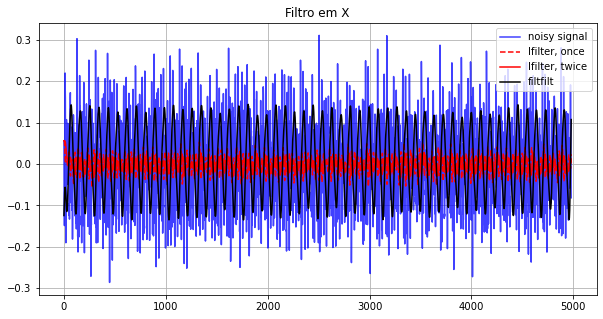

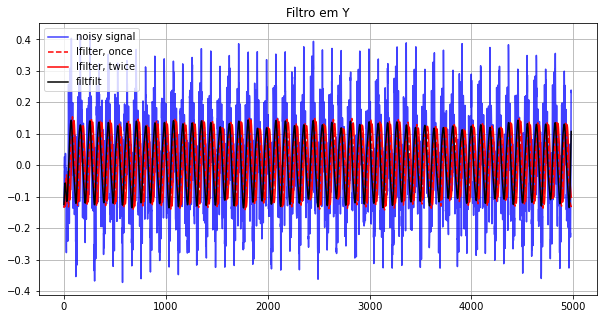

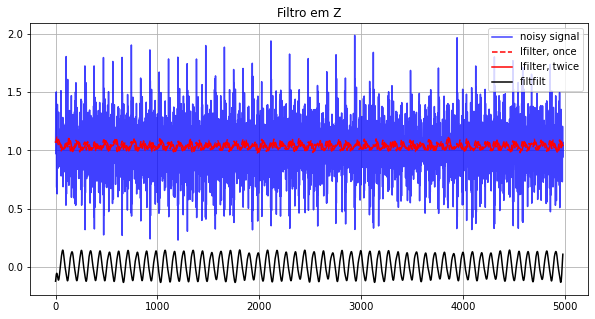

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


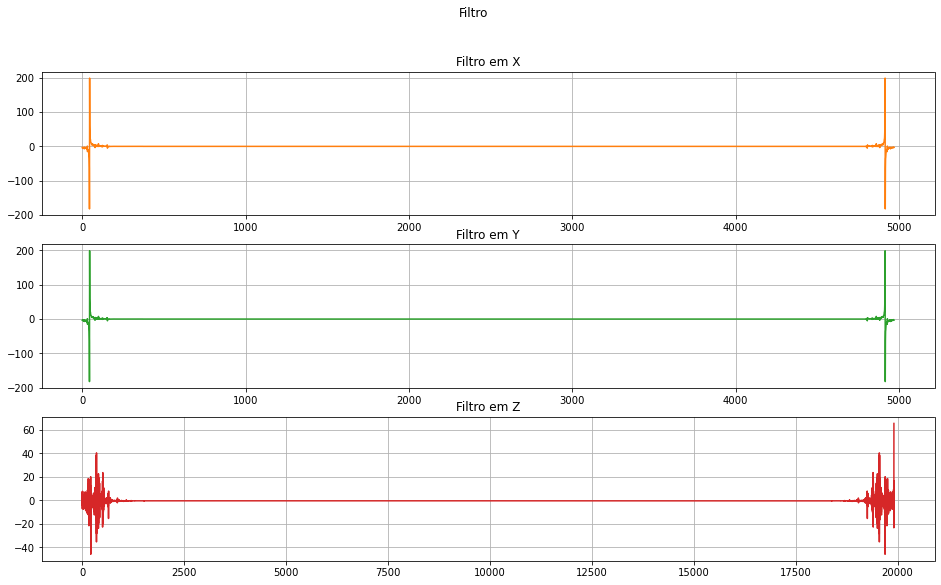

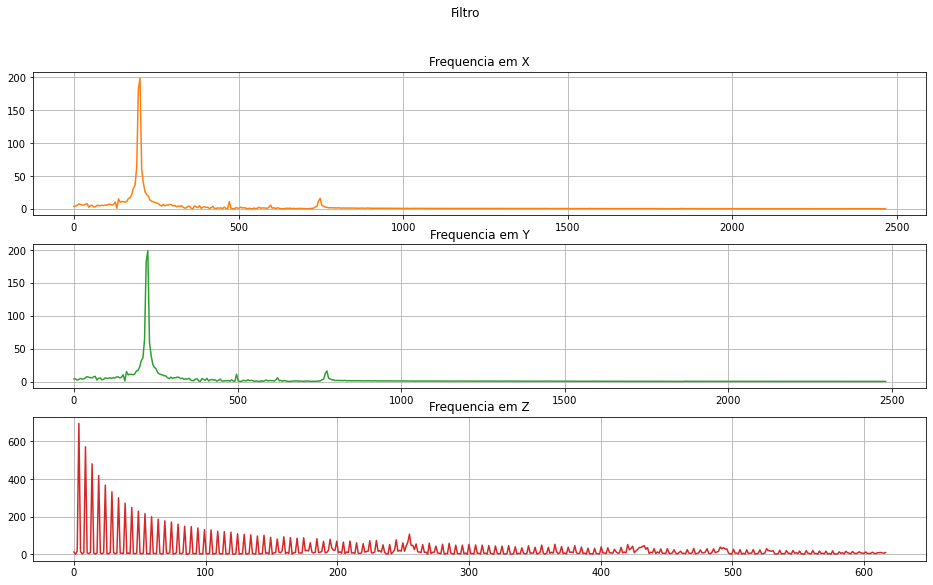

Os Picos para o eixo X são dentro das frequências: [  3   8  11  14  17  19  22  25  27  29  40  54  56  58  61  63  65  70
  73  76  79  81  84  87  89  91  94  98 101 103 106 109 112 114 119 121
 123 130 133 136 138 141 149 156 160 163 165 170 172 174 178 181 183 185
 187 193 196 198 202 207 209 212 215 220 226 228 231 233 235 238 240 242
 245 247 258 262 265 269 271 273 277 279 281 283 287 289 291 294 299 303
 305 309 312 316 319 321 324 326 330 332 336 338 341 343 345 348 350 357
 359 361 367 371 373 376 379 381 385 388 390 393 397 401 403 412 416 421
 423 427 430 434 439 446 453 468 478]
Os Picos para o eixo Y são dentro das frequências: [  4   8  13  16  19  22  24  27  30  32  34  45  59  61  63  66  68  70
  75  78  81  84  86  89  92  94  96  99 103 106 108 111 114 117 119 124
 126 128 135 138 141 143 146 154 161 165 168 170 175 177 179 183 186 188
 190 192 198 201 203 207 212 214 217 220 225 231 233 236 238 240 243 245
 247 250 252 263 267 270 274 276 278 282 284 286 288 292 

In [78]:
Analise_Geral(df4)

## Conclusão

Podemos observar que ao alicar o filtro todas as frequências de ruido foram retiradas para assim ficar a frquência do motor em si assim podemos observar que o motor 1 e 3 tem dificultades já que observa-se que mesmo aplicando o filtro tem frequências que não deveriam estar para um funcionamento normal, podemos afirmar isto proque supondo que todos os motores dos sensores são iguais possuem maior quantiade de picos natuais de uma vibração irregular. 